# Assignment 3: Playoff Game Preparation Report

## Objective
Evaluate a team's season performance through Efficiency and the Four Factors. Offense, defense, and everything in between.

## Instructions
- Go deeper than you did in Class 6’s lab. Cover the process we discussed in Class 6 and address anything of note for adjustments in the series from the previous games.
- Choose from the following:
    - Detroit going into Game 5 against New York
    - LA Lakers going into Game 4 against Minnesota
    - Denver going into Game 7 against LA Clippers
    - Boston going into Game 5 against New York
    - OKC going into Game 7 against Denver
- Prepare the shell of a pregame report. Provide these answers for both Offense and Defense separately:
    - Team Efficiency - How good are they offensively? Defensively?
    - Four Factors - What are they good at big picture?
    - Shot Profile - Where are they getting their shots relative to the league? Where are they allowing them?
    - What did Team A do well in these matchups? What went in Team B’s favor?

-----

# 2024-2025 Scouting Report
## Detroit Pistons vs New York Knicks - Round 1 - Game 5 of the 2024-2025 NBA Playoffs

### Section 0: Prepare the Data


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
# Load workbook and gather sheets
player_game_data = pd.read_excel("Player-Game-Data.xlsx", sheet_name = None)

In [4]:
# Read the Data
sheet_names = ["Line Score", "League Stats", 
               "Round 1 - Game 1", "Round 1 - Game 2", "Round 1 - Game 3", "Round 1 - Game 4",
               "Season - Game 6", "Season - Game 25", "Season - Game 40", "Season - Game 80",
               "Totals - Pistons", "Totals - Knicks"
              ]

# Convert Data to Multiple DataFrames
line_score = player_game_data["Line Score"]
league_stats = player_game_data["League Stats"]

# Game Box Scores
round1_game1 = player_game_data["Round 1 - Game 1"]
round1_game2 = player_game_data["Round 1 - Game 2"]
round1_game3 = player_game_data["Round 1 - Game 3"]
round1_game4 = player_game_data["Round 1 - Game 4"]
season_game6 = player_game_data["Season - Game 6"]
season_game25 = player_game_data["Season - Game 25"]
season_game40 = player_game_data["Season - Game 40"]
season_game80 = player_game_data["Season - Game 80"]

# Team Metrics
total_pistons = player_game_data["Totals - Pistons"]
total_knicks = player_game_data["Totals - Knicks"]

In [5]:
# Data Cleanup
all_games = [round1_game1, round1_game2, round1_game3, round1_game4,
             season_game6, season_game25, season_game40, season_game80
            ]

# List the Specific Game Names
game_names = ["Round 1 - Game 1", "Round 1 - Game 2", "Round 1 - Game 3", "Round 1 - Game 4",
              "Season - Game 6", "Season - Game 25", "Season - Game 40", "Season - Game 80"
             ]

In [6]:
# Print the Game Totals for each Pistons vs Knicks Game
for i in range(len(all_games)):
    print("Team Totals for " + game_names[i])
    team_totals = all_games[i].groupby("Team").sum(numeric_only = True)
    print(team_totals)
    print("")

Team Totals for Round 1 - Game 1
                 Minutes  Seconds  Decimal Minutes    FG   FGA    FG%    3P  \
Team                                                                          
Detroit Pistons      234      360            240.0  41.0  86.0  4.097  15.0   
New York Knicks      236      240            240.0  49.0  93.0  4.860  10.0   

                  3PA    3P%    FT  ...   DRB   TRB   AST   STL  BLK   TOV  \
Team                                ...                                      
Detroit Pistons  32.0  2.425  15.0  ...  26.0  37.0  23.0   6.0  9.0  19.0   
New York Knicks  26.0  2.708  15.0  ...  28.0  36.0  26.0  12.0  9.0   9.0   

                   PF    PTS   GmSc   +/-  
Team                                       
Detroit Pistons  21.0  112.0   82.7 -55.0  
New York Knicks  21.0  123.0  109.8  55.0  

[2 rows x 23 columns]

Team Totals for Round 1 - Game 2
                 Minutes  Seconds  Decimal Minutes    FG   FGA    FG%    3P  \
Team                     

In [7]:
# ------------ Four Factors Functions ------------
# From Assignment 2
def calculate_eFG_percentage(fgm, made_3s, fga):
    """
    Effective Field Goal Percentage (eFG%)
    eFG% = (FGM + 0.5 * 3PM) / FGA
    Returns decimal (e.g., 0.521 for 52.1%)
    """
    num = fgm + 0.5 * made_3s
    denom = fga
    if denom == 0:
        return np.nan
    return num / denom

def calculate_tov_percentage(tov, fga, fta):
    """
    Turnover Percentage (TOV%)
    TOV% = TOV / (FGA + 0.44 * FTA + TOV)
    Returns decimal.
    """
    num = tov
    denom = fga + 0.44 * fta + tov
    if denom == 0:
        return np.nan
    return num / denom

def calculate_estimated_ORB_percentage(ORB, opp_DRB):
    """
    Offensive Rebound Percentage (ORB%)
    ORB% = ORB / (ORB + Opp_DRB)
    Returns decimal.
    """
    num = ORB
    denom = ORB + opp_DRB
    if denom == 0:
        return np.nan
    return num / denom

def calculate_estimated_DRB_percentage(DRB, opp_ORB):
    """
    Defensive Rebound Percentage (DRB%)
    DRB% = DRB / (DRB + Opp_ORB)
    """
    denom = DRB + opp_ORB
    if denom == 0:
        return np.nan
    return DRB / denom

def calculate_ftr(fta, fga):
    """
    Free Throw Rate (FTR)
    FTR = FTA / FGA
    Returns decimal.
    """
    if fga == 0:
        return np.nan
    return fta / fga

In [8]:
# Define Focus Team
focus_team = "Detroit Pistons"  

game_rows = []

# Create a New DataFrame for Game Totals for each Team in each row
for game_name, game_df in zip(game_names, all_games):
    
    # Sum stats by team for this game
    team_totals = game_df.groupby("Team").sum(numeric_only=True).reset_index()

    # Code Check: should have exactly 2 teams per game
    if len(team_totals) != 2:
        print(f"Warning: {game_name} has {len(team_totals)} teams, skipping.")
        continue

    # Identify Focus Team and Opponent Team
    if focus_team not in team_totals["Team"].values:
        print(f"Warning: {focus_team} not found in {game_name}, skipping.")
        continue

    team_row = team_totals[team_totals["Team"] == focus_team].iloc[0]
    opp_row  = team_totals[team_totals["Team"] != focus_team].iloc[0]

    # Build a Flat Dict: one row per game
    row = {
        "Game": game_name,
        "Team": focus_team,
        "Opponent": opp_row["Team"],
    }

    # Pick which numeric stat columns you want to carry over
    stat_cols = [
        "Minutes", "Seconds", "Decimal Minutes",
        "FG", "FGA", "FG%", "3P", "3PA", "3P%", "FT", "FTA", "FT%",
        "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS",
        "GmSc", "+/-"
    ]

    for col in stat_cols:
        if col in team_totals.columns:
            row[f"Team_{col}"] = team_row[col]
            row[f"Opp_{col}"]  = opp_row[col]

    game_rows.append(row)

# One row per game: Team vs Opponent stats
game_totals = pd.DataFrame(game_rows)


In [9]:
# Create a Winner Column
game_totals["Winner"] = game_totals.apply(
    lambda r: r["Team"] if r["Team_PTS"] > r["Opp_PTS"] else r["Opponent"],
    axis = 1
)

# Create a Game Type Column
game_totals["Game Type"] = np.where(
    game_totals["Game"].str.contains("Round",
                                     case = False,
                                     na = False
                                    ),
    "Playoffs",
    "Regular Season"
)

In [10]:
# Filter for Knicks Games
knicks_games = game_totals[game_totals["Opponent"] == "New York Knicks"]

### Section 1: Team Efficiency




In [12]:
# ------------ Possessions, Ratings, & Pace ------------
# Functions from Assignment 2
def estimated_team_possessions(fga, fta, tov, oreb):
    """
    Single-side estimated possessions:
    Poss = FGA + 0.44*FTA + TOV - OREB
    """
    return fga + 0.44 * fta + tov - oreb

def estimated_game_possessions(team_fga, team_fta, team_tov, team_oreb,
                               opp_fga,  opp_fta,  opp_tov,  opp_oreb):
    """
    Dean Oliver shared-possession estimate for a game/season:
    0.5 * (TeamPoss + OppPoss)
    """
    team_poss = estimated_team_possessions(team_fga, team_fta, team_tov, team_oreb)
    opp_poss  = estimated_team_possessions(opp_fga,  opp_fta,  opp_tov,  opp_oreb)
    return 0.5 * (team_poss + opp_poss)

def calculate_offensive_efficiency(points, shared_possessions):
    """
    Offensive Rating (OER) = 100 * (Points / SharedPossessions)
    """
    if shared_possessions == 0:
        return np.nan
    return 100 * (points / shared_possessions)

def calculate_defensive_efficiency(opponent_points, shared_possessions):
    """
    Defensive Rating (DER) = 100 * (Opp Points / SharedPossessions)
    """
    if shared_possessions == 0:
        return np.nan
    return 100 * (opponent_points / shared_possessions)

def calculate_net_rating(oer, der):
    """
    Net Rating = OER - DER
    """
    if pd.isna(oer) or pd.isna(der):
        return np.nan
    return oer - der

def calculate_pace(team_fga, team_fta, team_tov, team_oreb,
                   opp_fga, opp_fta, opp_tov, opp_oreb,
                   team_min = 240, minutes_per_game = 48):
    """
    Calculate team Pace (possessions per 48 minutes).
    Pace = 48 * ((TeamPoss + OppPoss) / (2 * (TeamMin / 5)))
    Parameters:
        team_fga, team_fta, team_tov, team_oreb (float): team stats
        opp_fga, opp_fta, opp_tov, opp_oreb (float): opponent stats
        team_min (float): total minutes played (default = 240 for a 48-min game)
        minutes_per_game (float): Regulation game length (NBA=48, WNBA/FIBA=40)
    
    Returns:
        float: possessions per 48 minutes
    """
    team_poss = estimated_team_possessions(team_fga, team_fta, team_tov, team_oreb)
    opp_poss  = estimated_team_possessions(opp_fga,  opp_fta,  opp_tov,  opp_oreb)
    avg_poss  = (team_poss + opp_poss) / 2
    if team_min == 0:
        return np.nan
    return minutes_per_game * avg_poss / (team_min / 5)

In [13]:
# Calculate the Possessions, Ratings, & Pace for the Team and Opponent

# Estimated Game Possessions
knicks_games["Game_Poss"] = knicks_games.apply(
    lambda r: estimated_game_possessions(r["Team_FGA"], r["Team_FTA"], r["Team_TOV"], r["Team_ORB"],
                                         r["Opp_FGA"], r["Opp_FTA"], r["Opp_TOV"], r["Opp_ORB"]
                                        ),
    axis = 1
)

# Estimated Team Possessions
knicks_games["Team_Poss"] = knicks_games.apply(
    lambda r: estimated_team_possessions(r["Team_FGA"], r["Team_FTA"], r["Team_TOV"], r["Team_ORB"]),
    axis = 1
)

knicks_games["Opp_Poss"] = knicks_games.apply(
    lambda r: estimated_team_possessions(r["Opp_FGA"], r["Opp_FTA"], r["Opp_TOV"], r["Opp_ORB"]),
    axis = 1
)

knicks_games["∆Poss"] = knicks_games["Team_Poss"] - knicks_games["Opp_Poss"] # Positive, Team had more possessions than Opponents

# Calculate Offensive Efficiency (OER)
knicks_games["Team_OER"] = knicks_games.apply(
    lambda r: calculate_offensive_efficiency(r["Team_PTS"], r["Game_Poss"]),
    axis = 1
)

knicks_games["Opp_OER"] = knicks_games.apply(
    lambda r: calculate_offensive_efficiency(r["Opp_PTS"], r["Game_Poss"]),
    axis = 1
)

knicks_games["∆OER"] = knicks_games["Team_OER"] - knicks_games["Opp_OER"] # Positive, Team had a better OER than Opponent's

# Calculate Defensive Efficiency (DER)
knicks_games["Team_DER"] = knicks_games.apply(
    lambda r: calculate_defensive_efficiency(r["Opp_PTS"], r["Game_Poss"]),
    axis = 1
)

knicks_games["Opp_DER"] = knicks_games.apply(
    lambda r: calculate_defensive_efficiency(r["Team_PTS"], r["Game_Poss"]),
    axis = 1
)

knicks_games["∆DER"] = knicks_games["Team_DER"] - knicks_games["Opp_DER"] # Positive, Team had a worse DER than Opponent's

# Net Rating
knicks_games["Team_NetRtg"] = knicks_games.apply(
    lambda r: calculate_net_rating(r["Team_OER"], r["Team_DER"]),
    axis = 1
)

knicks_games["Opp_NetRtg"] = knicks_games.apply(
    lambda r: calculate_net_rating(r["Opp_OER"], r["Opp_DER"]),
    axis = 1
)

# Calculate Pace
knicks_games["Pace"] = knicks_games.apply(
    lambda r: calculate_pace(r["Team_FGA"], r["Team_FTA"], r["Team_TOV"], r["Team_ORB"],
                             r["Opp_FGA"], r["Opp_FTA"], r["Opp_TOV"], r["Opp_ORB"]
                            ),
    axis = 1
)




In [14]:
import pandas as pd

# --- Pace Table ---
pace_table = knicks_games.groupby("Game Type")[["Pace"]].mean().round(2)

# --- Possessions Table ---
poss_table = knicks_games.groupby("Game Type")[["Team_Poss", "Opp_Poss", "∆Poss"]].mean().round(2)

# --- Offensive Efficiency (OER) Table ---
oer_table = knicks_games.groupby("Game Type")[["Team_OER", "Opp_OER", "∆OER"]].mean().round(2)

# --- Defensive Efficiency (DER) Table ---
der_table = knicks_games.groupby("Game Type")[["Team_DER", "Opp_DER", "∆DER"]].mean().round(2)

# --- Net Rating Table ---
net_table = knicks_games.groupby("Game Type")[["Team_NetRtg", "Opp_NetRtg"]].mean().round(2)

# --- Combined Differentials Summary ---
diff_table = knicks_games.groupby("Game Type")[["∆Poss", "∆OER", "∆DER"]].mean().round(2)

# ----- PRINT WITH BLANK LINES -----
print("PACE SUMMARY")
print(pace_table, "\n")

print("POSSESSIONS SUMMARY")
print(poss_table, "\n")

print("OFFENSIVE EFFICIENCY (OER) SUMMARY")
print(oer_table, "\n")

print("DEFENSIVE EFFICIENCY (DER) SUMMARY")
print(der_table, "\n")

print("NET RATING SUMMARY")
print(net_table, "\n")

print("DIFFERENTIAL SUMMARY")
print(diff_table, "\n")


PACE SUMMARY
                 Pace
Game Type            
Playoffs        97.96
Regular Season  99.94 

POSSESSIONS SUMMARY
                Team_Poss  Opp_Poss  ∆Poss
Game Type                                 
Playoffs            97.53     98.38  -0.85
Regular Season      99.07    100.80  -1.73 

OFFENSIVE EFFICIENCY (OER) SUMMARY
                Team_OER  Opp_OER  ∆OER
Game Type                              
Playoffs          107.31   109.17 -1.86
Regular Season    114.39   116.02 -1.62 

DEFENSIVE EFFICIENCY (DER) SUMMARY
                Team_DER  Opp_DER  ∆DER
Game Type                              
Playoffs          109.17   107.31  1.86
Regular Season    116.02   114.39  1.62 

NET RATING SUMMARY
                Team_NetRtg  Opp_NetRtg
Game Type                              
Playoffs              -1.86        1.86
Regular Season        -1.62        1.62 

DIFFERENTIAL SUMMARY
                ∆Poss  ∆OER  ∆DER
Game Type                        
Playoffs        -0.85 -1.86  1.86
Regul

### Section 2: Four Factors

In [16]:
# Calculate the Four Factors

# Effective Field Goal Percentage
knicks_games["Team_eFG%"] = knicks_games.apply(
    lambda r: calculate_eFG_percentage(r["Team_FG"], r["Team_3P"], r["Team_FGA"]),
    axis=1
)

knicks_games["Opp_eFG%"] = knicks_games.apply(
    lambda r: calculate_eFG_percentage(r["Opp_FG"], r["Opp_3P"], r["Opp_FGA"]),
    axis=1
)

knicks_games["∆eFG%"] = knicks_games["Team_eFG%"] - knicks_games["Opp_eFG%"] # Positive, Team did better


# Turnover Percentage
knicks_games["Team_TOV%"] = knicks_games.apply(
    lambda r: calculate_tov_percentage(r["Team_TOV"], r["Team_FGA"], r["Team_FTA"]),
    axis = 1
)

knicks_games["Opp_TOV%"] = knicks_games.apply(
    lambda r: calculate_tov_percentage(r["Opp_TOV"], r["Opp_FGA"], r["Opp_FTA"]),
    axis = 1
)

knicks_games["∆TOV%"] = knicks_games["Team_TOV%"] - knicks_games["Opp_TOV%"] # Positive, Team did worse

# Calculate ORB Percentage
knicks_games["Team_ORB%"] = knicks_games.apply(
    lambda r: calculate_estimated_ORB_percentage(r["Team_ORB"], r["Opp_DRB"]),
    axis = 1
)

knicks_games["Opp_ORB%"] = knicks_games.apply(
    lambda r: calculate_estimated_ORB_percentage(r["Opp_ORB"], r["Opp_DRB"]),
    axis = 1
)

knicks_games["∆ORB%"] = knicks_games["Team_ORB%"] - knicks_games["Opp_ORB%"] # Positive, Team did better

# Calculate DRB Percentage
knicks_games["Team_DRB%"] = knicks_games.apply(
    lambda r: calculate_estimated_DRB_percentage(r["Team_DRB"], r["Opp_ORB"]),
    axis = 1
)

knicks_games["Opp_DRB%"] = knicks_games.apply(
    lambda r: calculate_estimated_DRB_percentage(r["Opp_DRB"], r["Opp_ORB"]),
    axis = 1
)

knicks_games["∆DRB%"] = knicks_games["Team_DRB%"] - knicks_games["Opp_DRB%"] # Positive, Team did better


# Calculate Free Throw Rate
knicks_games["Team_FTR"] = knicks_games.apply(
    lambda r: calculate_ftr(r["Team_FTA"], r["Team_FGA"]),
    axis = 1
)

knicks_games["Opp_FTR"] = knicks_games.apply(
    lambda r: calculate_ftr(r["Opp_FTA"], r["Opp_FGA"]),
    axis = 1
)

knicks_games["∆FTR"] = knicks_games["Team_FTR"] - knicks_games["Opp_FTR"] # Positive, Team did better

✅ Saved: charts/Detroit_Pistons_eFG%_Round_1_-_Game_1.png



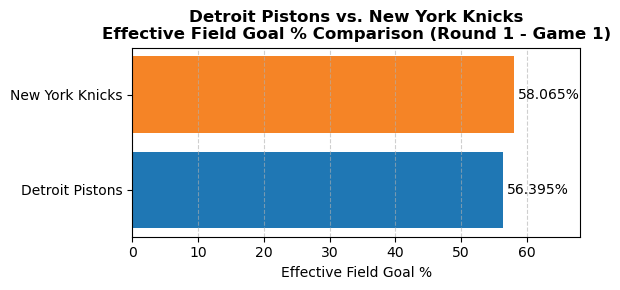

✅ Saved: charts/Detroit_Pistons_TOV%_Round_1_-_Game_1.png



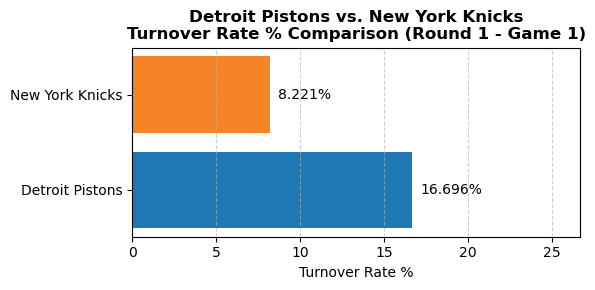

✅ Saved: charts/Detroit_Pistons_OREB%_Round_1_-_Game_1.png



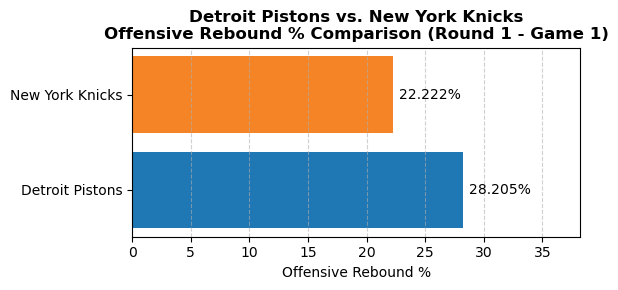

✅ Saved: charts/Detroit_Pistons_FTR_Round_1_-_Game_1.png



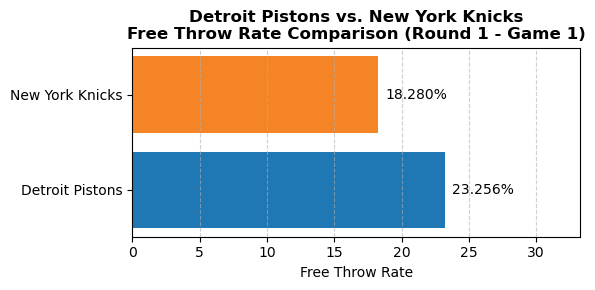

✅ Saved: charts/Detroit_Pistons_eFG%_Round_1_-_Game_2.png



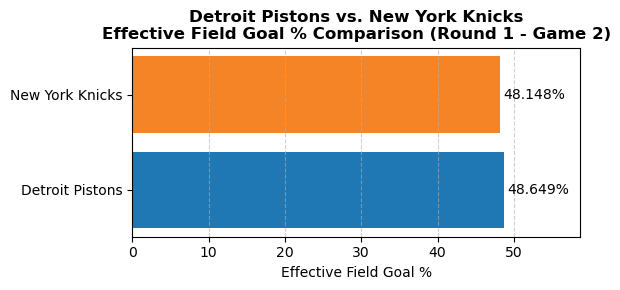

✅ Saved: charts/Detroit_Pistons_TOV%_Round_1_-_Game_2.png



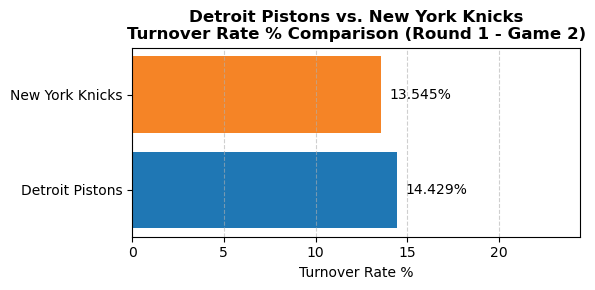

✅ Saved: charts/Detroit_Pistons_OREB%_Round_1_-_Game_2.png



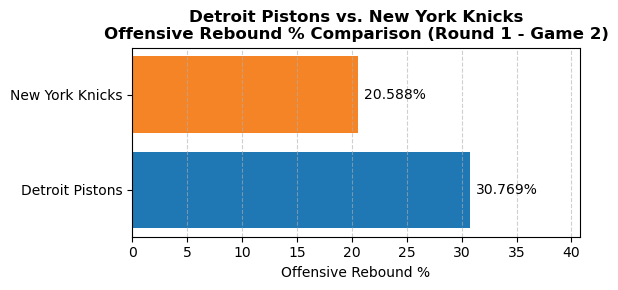

✅ Saved: charts/Detroit_Pistons_FTR_Round_1_-_Game_2.png



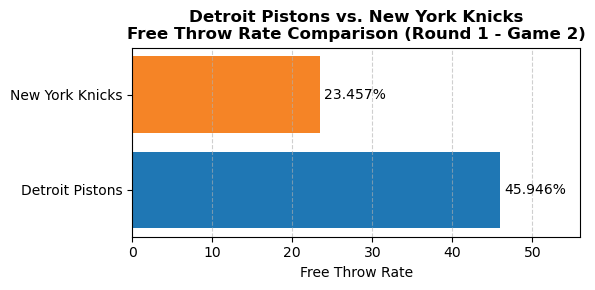

✅ Saved: charts/Detroit_Pistons_eFG%_Round_1_-_Game_3.png



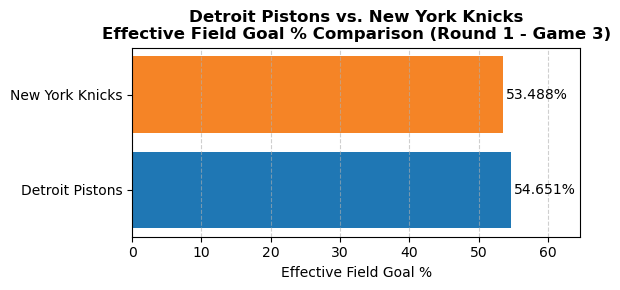

✅ Saved: charts/Detroit_Pistons_TOV%_Round_1_-_Game_3.png



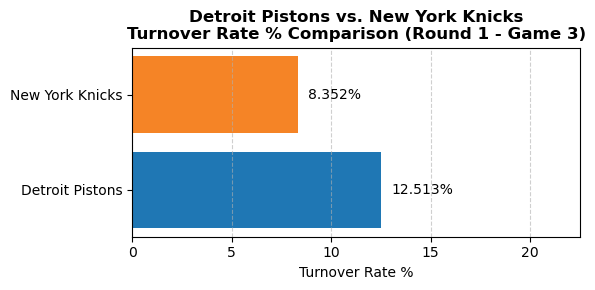

✅ Saved: charts/Detroit_Pistons_OREB%_Round_1_-_Game_3.png



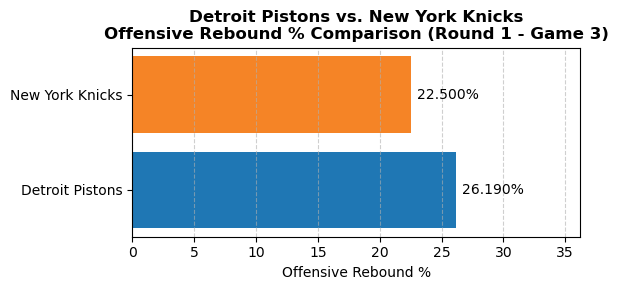

✅ Saved: charts/Detroit_Pistons_FTR_Round_1_-_Game_3.png



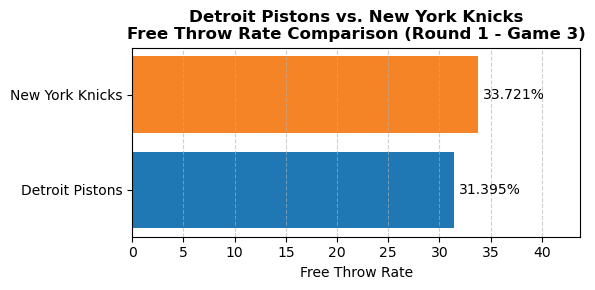

✅ Saved: charts/Detroit_Pistons_eFG%_Round_1_-_Game_4.png



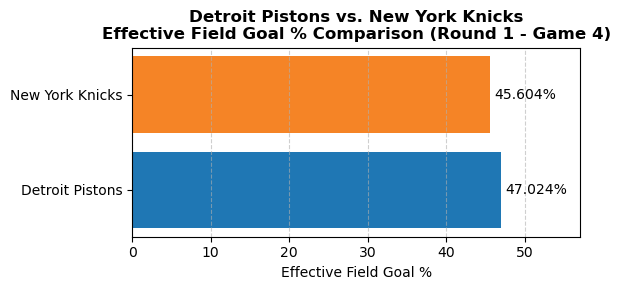

✅ Saved: charts/Detroit_Pistons_TOV%_Round_1_-_Game_4.png



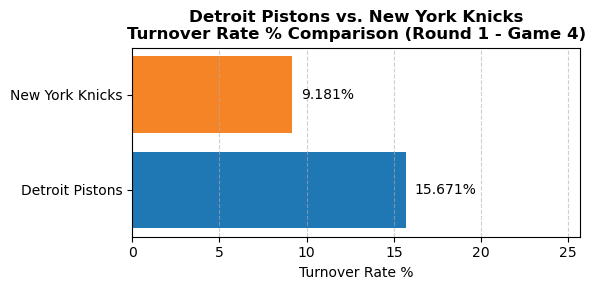

✅ Saved: charts/Detroit_Pistons_OREB%_Round_1_-_Game_4.png



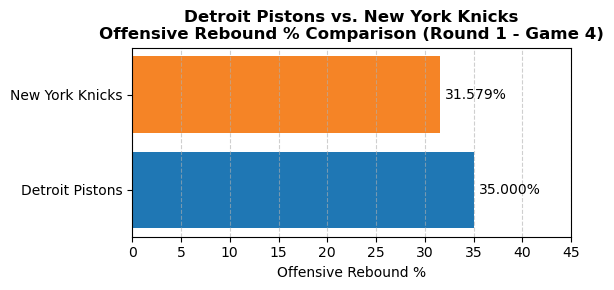

✅ Saved: charts/Detroit_Pistons_FTR_Round_1_-_Game_4.png



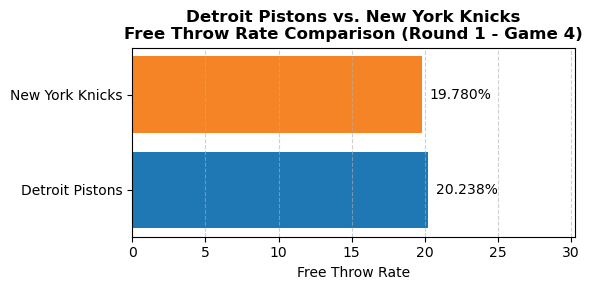

In [17]:
import matplotlib.pyplot as plt
import os

def plot_four_factor_from_row(
    row, 
    metric, 
    label, 
    team_name,
    opponent_name="Opponents",
    color_team="#1f77b4", 
    color_opp="#d62728",
    save_folder="charts"
):
    """
    Plot a Four Factor bar chart using a single-row dataframe.

    Parameters
    ----------
    row : pd.Series
        One row from game_totals.
    metric : str
        One of ['eFG%', 'TOV%', 'OREB%', 'FTR'].
    label : str
        Pretty axis/legend label.
    team_name : str
        Name for display.
    opponent_name : str
        Display name for opponent (default = 'Opponents').
    """

    # Column map
    col_map = {
        "eFG%":  ("Team_eFG%",  "Opp_eFG%"),
        "TOV%":  ("Team_TOV%",  "Opp_TOV%"),
        "OREB%": ("Team_ORB%",  "Opp_ORB%"),
        "FTR":   ("Team_FTR",   "Opp_FTR"),
    }

    if metric not in col_map:
        raise ValueError(f"Unknown metric '{metric}'. Use one of {list(col_map.keys())}.")

    team_col, opp_col = col_map[metric]

    # Validate columns exist
    if team_col not in row.index or opp_col not in row.index:
        raise KeyError(
            f"Expected columns '{team_col}' and '{opp_col}' not found.\n"
            f"Available columns: {list(row.index)}"
        )

    # Ensure save folder exists
    os.makedirs(save_folder, exist_ok=True)

    # Extract values
    team_value = row[team_col] * 100
    opp_value  = row[opp_col] * 100

    # Labels and values (team on top)
    categories = [team_name, opponent_name]
    values     = [team_value, opp_value]
    colors     = [color_team, color_opp]

    plt.figure(figsize=(6, 3))
    plt.barh(categories, values, color=colors)

    game_label = row["Game"] if "Game" in row.index else ""

    plt.title(
        f"{team_name} vs. {opponent_name}\n{label} Comparison ({game_label})",
        fontsize=12, weight="bold"
    )
    plt.xlabel(label)
    plt.xlim(0, max(values) + 10)
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # 3-decimal accuracy
    for i, v in enumerate(values):
        plt.text(v + 0.5, i, f"{v:.3f}%", va="center")

    plt.tight_layout()

    # Save filename
    safe_game = str(game_label).replace(" ", "_")
    filename = f"{save_folder}/{team_name.replace(' ', '_')}_{metric}_{safe_game}.png"
    
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    print(f"✅ Saved: {filename}\n")
    
    plt.show()


# Filter only Pistons playoff rows
pistons_playoffs = knicks_games[
    (knicks_games["Team"] == "Detroit Pistons") &
    (knicks_games["Game Type"] == "Playoffs")
]

for idx in range(len(pistons_playoffs)):
    row = pistons_playoffs.iloc[idx]

    plot_four_factor_from_row(row, "eFG%",  "Effective Field Goal %", "Detroit Pistons", opponent_name=row["Opponent"], color_opp="#F58426")
    plot_four_factor_from_row(row, "TOV%",  "Turnover Rate %",        "Detroit Pistons", opponent_name=row["Opponent"], color_opp="#F58426")
    plot_four_factor_from_row(row, "OREB%", "Offensive Rebound %",    "Detroit Pistons", opponent_name=row["Opponent"], color_opp="#F58426")
    plot_four_factor_from_row(row, "FTR",   "Free Throw Rate",        "Detroit Pistons", opponent_name=row["Opponent"], color_opp="#F58426")


### Shot Profile

In [19]:
# Load workbook and gather sheets
pistons_team_data = pd.read_excel("Pistons_Team_Data.xlsx", sheet_name = None)
knicks_team_data = pd.read_excel("Knicks_Team_Data.xlsx", sheet_name = None)

In [20]:
# Obtain the Shot Distribution Sheet
pistons_shots = pistons_team_data["Shot Distribution"]
knicks_shots = knicks_team_data["Shot Distribution"]

In [21]:
# Convert Date to DateTime
pistons_shots["Date"] = pd.to_datetime(pistons_shots["Date"])
knicks_shots["Date"] = pd.to_datetime(knicks_shots["Date"])

# Define Cutoff Date
cutoff = pd.to_datetime("2025-04-29")

# Filter the Data Before Round 1 - Game 5
pistons_shots = pistons_shots[pistons_shots["Date"] < cutoff]
knicks_shots = knicks_shots[knicks_shots["Date"] < cutoff]

In [22]:
# -------- Helper to build the contingency-style table --------
def summarize_shot_zones_by_team(shots_df: pd.DataFrame) -> pd.DataFrame:
    """
    Build a long-form table of shot frequency & accuracy by zone,
    split by Team and Game Type.

    Returns a DataFrame with columns:
      ['Team', 'Game Type', 'Zone', 'FGM', 'FGA', 'FG%', 'Freq%']
    where:
      FG%   = total makes / total attempts in that zone
      Freq% = zone attempts / total FGA across the 5 zones
    """

    # Define the 5 zones, mapping to your column names
    zones = [
        ("At Rim",    "AtRimFGM",         "AtRimFGA"),
        ("Short Mid", "ShortMidRangeFGM", "ShortMidRangeFGA"),
        ("Long Mid",  "LongMidRangeFGM",  "LongMidRangeFGA"),
        ("Corner 3",  "Corner3FGM",       "Corner3FGA"),
        ("Arc 3",     "Arc3FGM",          "Arc3FGA"),
    ]

    # We’ll summarize for each (Team, Game Type) combo
    group_cols = ["Team", "Game Type"]
    summary_rows = []

    for (team, gtype), grp in shots_df.groupby(group_cols):
        # Total FGA across all 5 zones for frequency calculation
        total_fga = 0
        zone_stats = {}

        for zone_name, fgm_col, fga_col in zones:
            fgm = grp[fgm_col].sum()
            fga = grp[fga_col].sum()
            zone_stats[zone_name] = {"FGM": fgm, "FGA": fga}
            total_fga += fga

        # Compute FG% and Freq% for each zone
        for zone_name, _fgm_col, _fga_col in zones:
            fgm = zone_stats[zone_name]["FGM"]
            fga = zone_stats[zone_name]["FGA"]

            fg_pct = np.nan if fga == 0 else fgm / fga
            freq_pct = np.nan if total_fga == 0 else fga / total_fga

            summary_rows.append({
                "Team": team,
                "Game Type": gtype,
                "Zone": zone_name,
                "FGM": fgm,
                "FGA": fga,
                "FG%": fg_pct,
                "Freq%": freq_pct
            })

    summary_df = pd.DataFrame(summary_rows)

    # Sort for readability
    summary_df = summary_df.sort_values(["Team", "Game Type", "Zone"]).reset_index(drop=True)
    return summary_df


# -------- Use the function for Pistons & Knicks --------
pistons_zone_summary = summarize_shot_zones_by_team(pistons_shots)
knicks_zone_summary  = summarize_shot_zones_by_team(knicks_shots)

# Pistons, Regular Season and Playoffs 
pistons_regular_season_table = pistons_zone_summary[
    (pistons_zone_summary["Team"] == "Detroit Pistons") &
    (pistons_zone_summary["Game Type"] == "Regular Season")
]


pistons_playoffs_table = pistons_zone_summary[
    (pistons_zone_summary["Team"] == "Detroit Pistons") &
    (pistons_zone_summary["Game Type"] == "Playoffs")
]

# Knicks, Regular Season and Playoffs 
knicks_playoffs_table = knicks_zone_summary[
    (knicks_zone_summary["Team"] == "New York Knicks") &
    (knicks_zone_summary["Game Type"] == "Playoffs")
]

knicks_regular_season_table = knicks_zone_summary[
    (knicks_zone_summary["Team"] == "New York Knicks") &
    (knicks_zone_summary["Game Type"] == "Regular Season")
]

print(pistons_regular_season_table, "\n")
print(pistons_playoffs_table, "\n")
print(knicks_regular_season_table, "\n")
print(knicks_playoffs_table, "\n")



              Team       Game Type       Zone   FGM   FGA       FG%     Freq%
5  Detroit Pistons  Regular Season      Arc 3   782  2189  0.357241  0.297378
6  Detroit Pistons  Regular Season     At Rim  1426  2154  0.662024  0.292623
7  Detroit Pistons  Regular Season   Corner 3   269   712  0.377809  0.096726
8  Detroit Pistons  Regular Season   Long Mid   189   480  0.393750  0.065209
9  Detroit Pistons  Regular Season  Short Mid   835  1826  0.457284  0.248064 

              Team Game Type       Zone  FGM  FGA       FG%     Freq%
0  Detroit Pistons  Playoffs      Arc 3   33   86  0.383721  0.260606
1  Detroit Pistons  Playoffs     At Rim   63  100  0.630000  0.303030
2  Detroit Pistons  Playoffs   Corner 3   11   39  0.282051  0.118182
3  Detroit Pistons  Playoffs   Long Mid   13   32  0.406250  0.096970
4  Detroit Pistons  Playoffs  Short Mid   29   73  0.397260  0.221212 

              Team       Game Type       Zone   FGM   FGA       FG%     Freq%
5  New York Knicks  Regular Se

In [23]:
# Export DataFrames
knicks_games.to_csv("Pistons-Knicks_Game_Totals.csv", index = False)
pistons_regular_season_table.to_excel("Pistons_Regular_Season_Zone.xlsx", index = False)
pistons_playoffs_table.to_excel("Pistons_Playoff_Shot_Zones_PreG5.xlsx", index=False)
knicks_regular_season_table.to_excel("Knicks_Regular_Season_Zone.xlsx", index = False)
knicks_playoffs_table.to_excel("Knicks_Playoff_Shot_Zones_PreG5.xlsx", index=False)

# Additional Analyses

✅ Saved: charts/New_York_Knicks_eFG%_Regular_Season.png



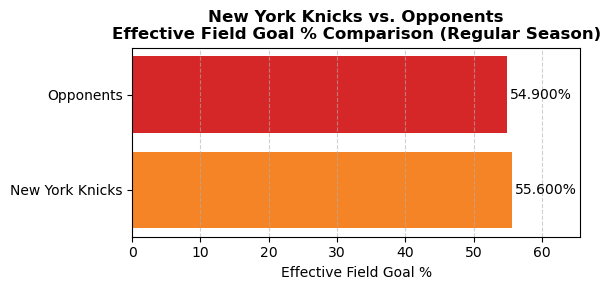

✅ Saved: charts/New_York_Knicks_TOV%_Regular_Season.png



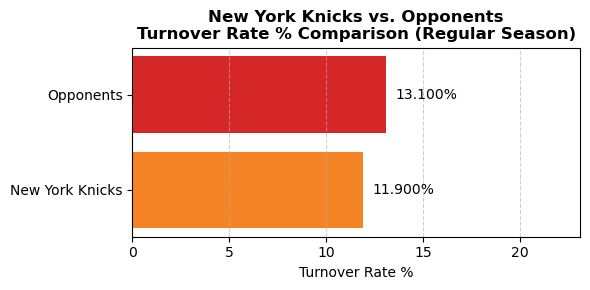

✅ Saved: charts/New_York_Knicks_OREB%_Regular_Season.png



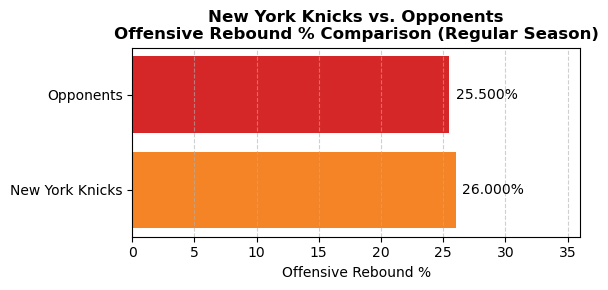

✅ Saved: charts/New_York_Knicks_FTR_Regular_Season.png



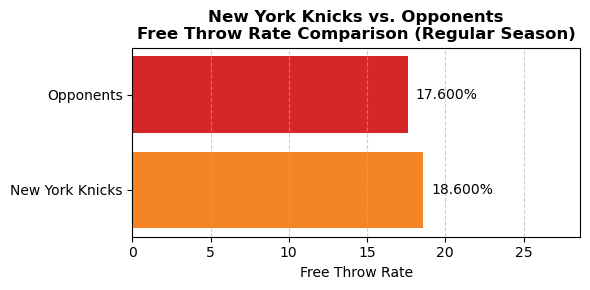

In [25]:
knicks_reg_offense = {
    "Team_eFG%": 0.556,
    "Team_TOV%": 0.119,
    "Team_ORB%": 0.260,
    "Team_FTR": 0.186,
}

knicks_reg_defense = {
    "Opp_eFG%": 0.549,
    "Opp_TOV%": 0.131,
    "Opp_DRB%": 0.745,   # Knicks Defensive Rebound Rate
    "Opp_FTR": 0.176,
}

knicks_reg_summary = {
    "Team": "New York Knicks",
    "Games": 82,
    "Game": "Regular Season",

    # Team (OFFENSE)
    "Team_eFG%": 0.556,
    "Team_TOV%": 0.119,
    "Team_ORB%": 0.260,
    "Team_FTR": 0.186,

    # Opponent (DEFENSE)
    "Opp_eFG%": 0.549,
    "Opp_TOV%": 0.131,
    "Opp_ORB%": 0.255,      # Knicks DRB% was given instead of Opp ORB%, Compute as 1 - 0.745
    "Opp_DRB%": 0.745,
    "Opp_FTR": 0.176,
}

plot_four_factor_from_row(pd.Series(knicks_reg_summary), "eFG%",  "Effective Field Goal %", "New York Knicks", color_team="#F58426")
plot_four_factor_from_row(pd.Series(knicks_reg_summary), "TOV%",  "Turnover Rate %",       "New York Knicks",  color_team="#F58426")
plot_four_factor_from_row(pd.Series(knicks_reg_summary), "OREB%", "Offensive Rebound %",   "New York Knicks",  color_team="#F58426")
plot_four_factor_from_row(pd.Series(knicks_reg_summary), "FTR",   "Free Throw Rate",       "New York Knicks",  color_team="#F58426")


✅ Saved: charts/Detroit_Pistons_eFG%_Regular_Season.png



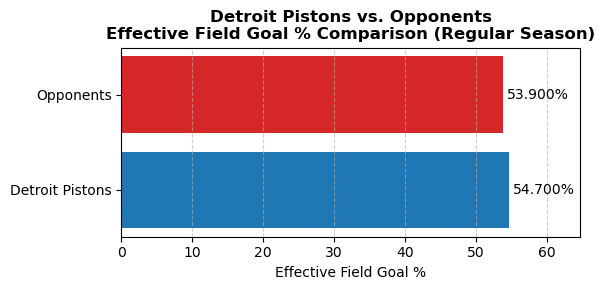

✅ Saved: charts/Detroit_Pistons_TOV%_Regular_Season.png



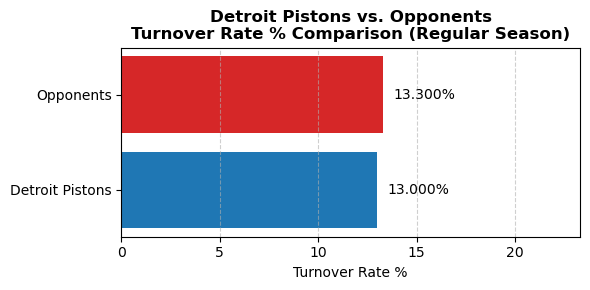

✅ Saved: charts/Detroit_Pistons_OREB%_Regular_Season.png



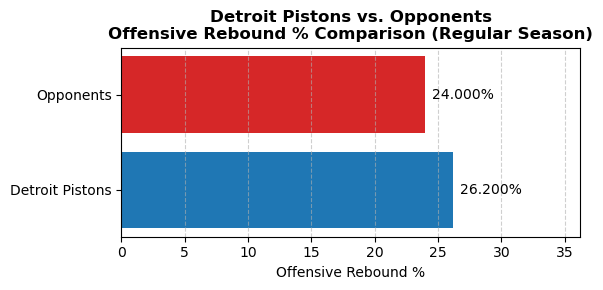

✅ Saved: charts/Detroit_Pistons_FTR_Regular_Season.png



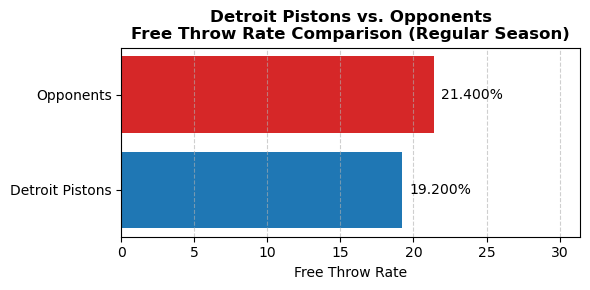

In [26]:
pistons_reg_offense = {
    "Team_eFG%": 0.547,
    "Team_TOV%": 0.13,
    "Team_ORB%": 0.262,
    "Team_FTR": 0.192,
}

pistons_reg_defense = {
    "Opp_eFG%": 0.539,
    "Opp_TOV%": 0.133,
    "Opp_DRB%": 0.760,   # Knicks Defensive Rebound Rate
    "Opp_FTR": 0.214,
}

pistons_reg_summary = {
    "Team": "Detroit Pistons",
    "Games": 82,
    "Game": "Regular Season",

    # Team (OFFENSE)
    "Team_eFG%": 0.547,
    "Team_TOV%": 0.13,
    "Team_ORB%": 0.262,
    "Team_FTR": 0.192,

    # Opponent (DEFENSE)
    "Opp_eFG%": 0.539,
    "Opp_TOV%": 0.133,
    "Opp_ORB%": 1 - 0.760,      # Knicks DRB% was given instead of Opp ORB%, Compute as 1 - 0.745
    "Opp_DRB%": 0.760,
    "Opp_FTR": 0.214,
}

plot_four_factor_from_row(pd.Series(pistons_reg_summary), "eFG%",  "Effective Field Goal %", "Detroit Pistons")
plot_four_factor_from_row(pd.Series(pistons_reg_summary), "TOV%",  "Turnover Rate %",       "Detroit Pistons")
plot_four_factor_from_row(pd.Series(pistons_reg_summary), "OREB%", "Offensive Rebound %",   "Detroit Pistons")
plot_four_factor_from_row(pd.Series(pistons_reg_summary), "FTR",   "Free Throw Rate",       "Detroit Pistons")
